In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
from glob import glob
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_path = 'data/train_set'
test_path = 'data/test_set'

In [3]:
IMAGE_SIZE = [200, 200]

In [4]:
ptm = PretrainedModel(input_shape= IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
ptm.trainable = False

In [6]:
K = 2
x = Flatten()(ptm.output)
x = Dense(K, activation='softmax')(x)

In [7]:
model = Model(inputs=ptm.input, outputs=x)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [9]:
gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

In [10]:
batch_size = 128

train_generator = gen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size= batch_size,
    shuffle=True
)

test_generator = gen.flow_from_directory(
    test_path,
    target_size=IMAGE_SIZE,
    batch_size= batch_size
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
r = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    steps_per_epoch= int(np.ceil(3000/batch_size)),
    validation_steps= int(np.ceil(1000/batch_size))
)

Epoch 1/10
24/24 [==============================] - 56s 2s/step - loss: 1.3463 - accuracy: 0.9307 - val_loss: 1.0122 - val_accuracy: 0.9570
Epoch 2/10
24/24 [==============================] - 49s 2s/step - loss: 0.5110 - accuracy: 0.9780 - val_loss: 1.2609 - val_accuracy: 0.9560
Epoch 3/10
24/24 [==============================] - 46s 2s/step - loss: 0.3513 - accuracy: 0.9807 - val_loss: 0.8938 - val_accuracy: 0.9680
Epoch 4/10
24/24 [==============================] - 47s 2s/step - loss: 0.2177 - accuracy: 0.9873 - val_loss: 0.8837 - val_accuracy: 0.9680
Epoch 5/10
24/24 [==============================] - 47s 2s/step - loss: 0.3058 - accuracy: 0.9820 - val_loss: 0.7932 - val_accuracy: 0.9680
Epoch 6/10
24/24 [==============================] - 48s 2s/step - loss: 0.1655 - accuracy: 0.9917 - val_loss: 0.9923 - val_accuracy: 0.9690
Epoch 7/10
24/24 [==============================] - 48s 2s/step - loss: 0.2101 - accuracy: 0.9903 - val_loss: 1.0535 - val_accuracy: 0.9670
Epoch 8/10
24/24 [==

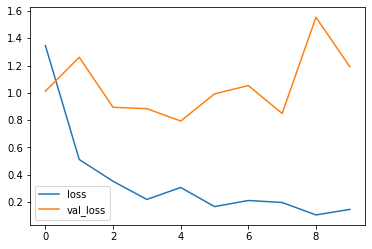

In [13]:
# Plot loss graph
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

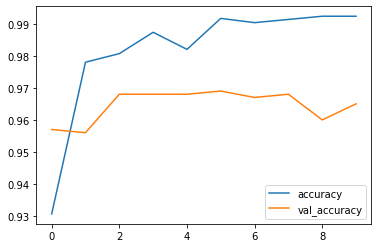

In [14]:
# Plot accuracy graph
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()